In [1]:
import numpy as np
import os
import pandas as pd
import ast

In [12]:


def plot_side_by_side(cqt1, cqt2, cqt3):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20, 6))
    
    # Plot the first CQT spectrogram
    plt.subplot(1, 3, 1)
    plt.imshow(cqt1, aspect='auto', origin='lower', cmap='gray_r')
    plt.colorbar(label='Magnitude db')
    plt.title('CQT Spectrogram 1')
    plt.xlabel('Time (frames)')
    plt.ylabel('Frequency bins')
    
    # Plot the second CQT spectrogram
    plt.subplot(1, 3, 2)
    plt.imshow(cqt2, aspect='auto', origin='lower', cmap='gray_r')
    plt.colorbar(label='Magnitude db')
    plt.title('CQT Spectrogram 2')
    plt.xlabel('Time (frames)')
    plt.ylabel('Frequency bins')

    plt.subplot(1, 3, 3)
    plt.imshow(cqt3, aspect='auto', origin='lower', cmap='gray_r')
    plt.colorbar(label='Magnitude db')
    plt.title('CQT Spectrogram 3')
    plt.xlabel('Time (frames)')
    plt.ylabel('Frequency bins')
    
    plt.tight_layout()
    plt.show()

def compare(cqt1, cqt2, cqt3, fn=None):
    if fn is not None:
        cqt1 = fn(cqt1)
        cqt2 = fn(cqt2)
        cqt3 = fn(cqt3)
    return plot_side_by_side(cqt1, cqt2, cqt3)

In [61]:
261020 + 53891

314911

In [2]:
def read_clique2versions(clique2versions_path: str) -> dict[int, list[int]]:
    import ast
    df = pd.read_csv(clique2versions_path, sep="\t", converters={"versions": ast.literal_eval})
    clique2tracks = df.set_index("clique")["versions"].to_dict()
    return clique2tracks

In [66]:
clique2tracks = read_clique2versions("/home/yskhnykov/yandex_cup/data/raw/cliques2versions.tsv")

In [67]:
RAW_DATA_PATH = "/home/yskhnykov/yandex_cup/data/raw"

In [68]:
tracks = {
    int(x.split(".")[0]): np.load(os.path.join(RAW_DATA_PATH, f"train/{x}")) for x in os.listdir(os.path.join(RAW_DATA_PATH, "train"))
}

In [79]:
bad_items = [
    (k, np.std(v, axis=0).min(), np.std(v, axis=1).min()) 
    for k, v in tracks.items() 
    if np.any(np.std(v, axis=0) < 1) or np.any(np.std(v, axis=1) < 1)
]

In [80]:
len(bad_items)

8510

In [81]:
track2clique = {
    track: clique for clique, tracks in clique2tracks.items() for track in tracks
}

In [82]:
clique2tracks[track2clique[170065]]

[345963,
 356274,
 62836,
 147879,
 147996,
 170065,
 178482,
 324743,
 327413,
 331879,
 334108,
 76723,
 189583,
 238349,
 239578,
 223302,
 250623,
 203781,
 60986,
 61565]

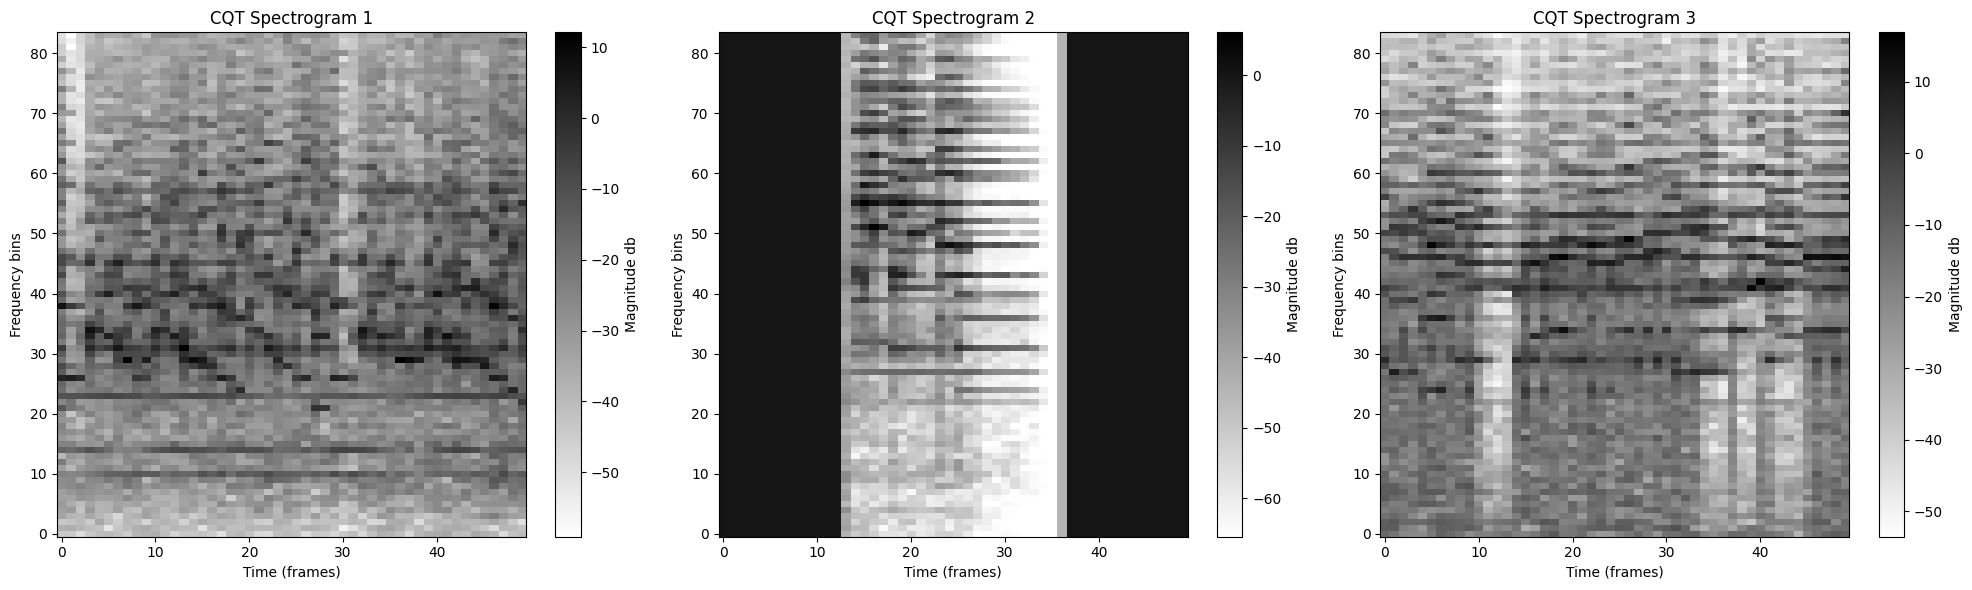

In [83]:
cqt1 = np.load(os.path.join(RAW_DATA_PATH, "train/345963.npy"))
cqt2 = np.load(os.path.join(RAW_DATA_PATH, "train/170065.npy"))
cqt3 = np.load(os.path.join(RAW_DATA_PATH, "train/61565.npy"))

compare(cqt1, cqt2, cqt3)

In [84]:
res = {}
bad_items = set([b[0] for b in bad_items])
for clique, ctracks in clique2tracks.items():
    new_tracks = [t for t in ctracks if t not in bad_items]
    if len(new_tracks) > 1:
        res[clique] = new_tracks

In [85]:
new_df = pd.DataFrame({"clique": list(res.keys()), "versions": list(res.values())})

In [86]:
new_df.to_csv("/home/yskhnykov/yandex_cup/data/raw/cliques2versions_cleaned_8500.tsv", index=False, sep="\t")

In [42]:
pd.read_csv("/home/yskhnykov/yandex_cup/data/raw/cliques2versions_cleaned_axis_0_1_3.tsv", sep="\t", converters={"versions": ast.literal_eval})

,clique,versions
0,39475,"[343223, 361210, 114472, 134744, 271362, 30747..."
1,20077,"[343224, 350590, 170706, 266043, 314556, 30764..."
2,22290,"[343225, 343986, 344624, 345116, 345312, 33796..."
3,17098,"[343226, 220430]"
4,26349,"[343227, 286579]"
...,...,...
41591,16898,"[70624, 76088]"
41592,31616,"[70632, 76025]"
41593,40137,"[71481, 73797]"
41594,21450,"[71855, 74678]"


In [87]:
bad_items = [
    (k, np.std(v, axis=0).min(), np.std(v, axis=1).min()) 
    for k, v in tracks.items() 
    if np.any(np.std(v, axis=0) < 1.0)
]

In [88]:
len(bad_items)

535

In [89]:
res = {}
bad_items_set = set([b[0] for b in bad_items])
for clique, ctracks in clique2tracks.items():
    new_tracks = [t for t in ctracks if t not in bad_items_set]
    if len(new_tracks) > 1:
        res[clique] = new_tracks

In [90]:
new_df = pd.DataFrame({"clique": list(res.keys()), "versions": list(res.values())})

In [91]:
new_df.to_csv("/home/yskhnykov/yandex_cup/data/raw/cliques2versions_cleaned_500.tsv", index=False, sep="\t")

In [58]:
pd.read_csv("/home/yskhnykov/yandex_cup/data/raw/cliques2versions_cleaned_std_2034.tsv", sep="\t", converters={"versions": ast.literal_eval})

,clique,versions
0,39475,"[343223, 361210, 114472, 134744, 271362, 30747..."
1,20077,"[343224, 350590, 170706, 266043, 314556, 30764..."
2,22290,"[343225, 343986, 344624, 345116, 345312, 33796..."
3,17098,"[343226, 220430]"
4,26349,"[343227, 286579]"
...,...,...
41494,16898,"[70624, 76088]"
41495,31616,"[70632, 76025]"
41496,40137,"[71481, 73797]"
41497,21450,"[71855, 74678]"


In [52]:
df["versions"].str.len().sum()

np.int64(314939)

In [42]:
from collections import defaultdict

def save_tracks_to_file(data, output_path):
    df = pd.DataFrame(
        {
            'query_trackid': list(data.keys()),
            'track_ids': [
                ' '.join(map(lambda x: str(int(x)), track_ids)) for track_ids in data.values()
            ],
        }
    )
    df['output'] = df['query_trackid'].astype(str) + ' ' + df['track_ids'].astype(str)
    df.sort_values("query_trackid", inplace=True)
    df[['output']].to_csv(output_path, index=False, header=False)


CANDIDATES_FROM_FOLDS = 100
TOP_K = 100

def get_neighbors(df_path):
    df = pd.read_csv(df_path, header=None)
    track2sourceneighbors = {}
    for row in df.itertuples(index=False):
        track, *original_neighbors = map(int, row[0].split())
        track2sourceneighbors[track] = original_neighbors
    return track2sourceneighbors


def reduce_by_folds(fold_top_tracks, importance_ranks=None):
    if importance_ranks is None:
        importance_ranks = [0] * len(fold_top_tracks)
    ranks = {}
    counter = {}
    for ir, fold in zip(importance_ranks, fold_top_tracks):
        for track_id, top_tracks in fold.items():
            if track_id not in ranks:
                ranks[track_id] = defaultdict(int)
                counter[track_id] = defaultdict(int)
            for rank, recommended_track in enumerate(top_tracks):
                ranks[track_id][recommended_track] += ir + rank
                counter[track_id][recommended_track] += 1

    candidates_with_score = {}
    for track_id, candidates_with_rank in ranks.items():
        if track_id not in candidates_with_score:
            candidates_with_score[track_id] = defaultdict(float)
        for recommended_track, total_rank in candidates_with_rank.items():
            cnt = counter[track_id][recommended_track]
            total_rank += CANDIDATES_FROM_FOLDS * (len(fold_top_tracks) - cnt)
            candidates_with_score[track_id][recommended_track] = total_rank

    res = {}
    for track_id, cws in candidates_with_score.items():
        best_tracks = [x[0] for x in sorted(cws.items(), key=lambda x: x[1])[:TOP_K]]
        res[track_id] = best_tracks

    return res

In [47]:
data = reduce_by_folds([
    get_neighbors("artifacts_TinyVIT_6Folds/submissions/submission.csv"),
    get_neighbors("artifacts_hgnetv2_b5_after_check_semihard_6folds_27_17_06/submissions/submission.csv"),
    get_neighbors("artifacts_hgnetv2_b5_with_aug_label_sm_6folds_27_03_56/submissions/submission.csv"),
    get_neighbors("artifacts_gcresnext50ts_6folds/submissions/submission.csv"),
], importance_ranks=[0.5, 0.1, 0.2, 0.6])

In [48]:
save_tracks_to_file(data, "blend_2.csv")

In [46]:
pd.read_csv("artifacts_hgnetv2_b5_after_check_semihard_6folds_27_17_06/submissions/submission.csv", header=None)

,0
0,1 12945 47143 27655 39321 40058 5827 1756 1182...
1,2 25683 21292 20243 22052 4190 27920 11164 324...
2,3 38279 13587 36812 8745 53305 20951 48340 147...
3,4 48455 25335 22072 10076 21241 21167 9738 105...
4,5 51064 29937 16196 40623 22929 13022 41892 53...
...,...
55165,55166 52856 39246 16489 4686 14095 50058 30720...
55166,55167 52404 7207 49439 24895 1939 53548 15883 ...
55167,55168 54677 34744 48114 28641 49432 1751 40635...
55168,55169 18699 46842 8386 3707 32067 13514 20624 ...


In [45]:
pd.read_csv("blend.csv", header=None)

,0
0,1 12945 27655 39321 40058 5827 1756 25698 4492...
1,2 25683 27920 267 20243 16984 3608 4190 32499 ...
2,3 38279 36812 20951 18556 41077 2451 1180 4050...
3,4 25335 21167 2088 47806 21241 25663 10076 366...
4,5 51064 25553 22929 16196 29937 53109 38566 43...
...,...
55165,55166 52856 39246 16489 50058 14095 4686 20379...
55166,55167 52404 1939 24895 49439 7207 53548 15883 ...
55167,55168 54677 49432 47169 15564 28641 7530 34744...
55168,55169 18699 46842 13514 49274 36851 12239 2062...
